**профили компактности**


доля соседей объекта принадлежащих другому классу


Евгений Борисов esborisov@sevsu.ru

---

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
n = 150
data = [ 
        [ np.random.rand(n,2)+[0,0.0], np.random.rand(n,2)+[0,0.1] ], 
        [ np.random.rand(n,2)+[0,0.0], np.random.rand(n,2)+[0,0.6] ], 
        [ np.random.rand(n,2)+[0,0.0], np.random.rand(n,2)+[0,1.0] ], 
        [ np.random.rand(n,2)+[0,0.0], np.random.rand(n,2)+[0,2.0] ], 
       ]

In [3]:
def comp_prof(d):
    X = np.vstack(d)
    y = np.asarray( [0]*len(d[0])+[1]*len(d[1]) )
    r = euclidean_distances(X) # матрица расстояний (Евклидова метрика)
    ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
    nc = y[ ri.flatten() ].reshape(r.shape) # номера классов для соседей в порядке увеличения расстояния 

    # инвертируем метку класса 1 для подсчёта точек-соседей из чужих классов
    nc = np.vstack([ (nc[ nc[:,0]==1 ]-1)*-1, nc[ nc[:,0]==0 ] ])
    # считаем чужих соседей k-тых в очереди удаления от объекта
    pc = np.asarray([ nc[:,k].sum() for k in range(1,nc.shape[1]) ])

    return pc / pc.max()

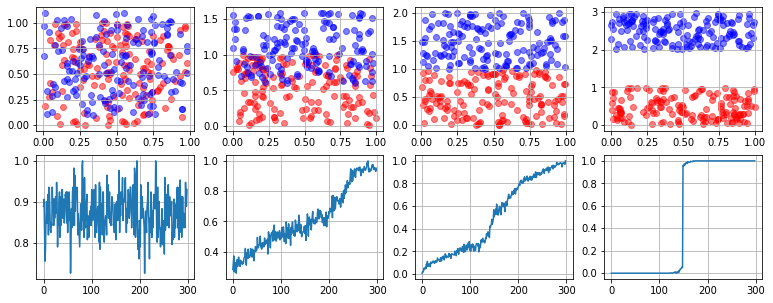

In [4]:
f, axarr = plt.subplots(2,len(data), sharey=False, sharex=False, figsize=(13,5),)
    
for i,d in enumerate(data):
    axarr[0][i].scatter( x=d[0][:,0], y=d[0][:,1], alpha=0.5, c='r' )
    axarr[0][i].scatter( x=d[1][:,0], y=d[1][:,1], alpha=0.5, c='b' )
    axarr[0][i].grid()
   
    pc = comp_prof(d)
    axarr[1][i].plot( range(len(pc)) , pc ) 
    axarr[1][i].grid()

# plt.savefig('pcom.png')
plt.show()